<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project4_2_neural_network_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks - multiclass classification
# Forward propagation

# دسته بندی چند کلاسه با استفاده از شبکه های عصبی


در این پروژه هدف تشخیص عدد موجود در تصویر می باشد

:مشخصات دیتا

دیتای ورودی : تصاویر از اعداد دست نویس در ابعاد 20 در 20

دیتای خروجی : شماره موجود در تصویر (0 تا 9)

<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1sxVH40ipiXH_93wev5YHY0xgx4Y5dkeJ">
</p>

در این پروژه قصد ما آموزش شبکه های عصبی نیست

بلکه فقط از ضرایب از قبل آموزش داده شده استفاده می کنیم

و آن را برروی داده ها تست میکنیم و نحوه محاسبه خروجی را مشابه اسلاید پیاده سازی خواهیم کرد

بریم ابتدا داده ها و وزنها  رو لود کنیم

In [ ]:
#load data set from project4data1.mat file
#ذخیره شده است .mat تصاویر در یک فایل با فرمت 
#first upload project4data1.mat to colab
#ابتدا فایل مربوطه را در این محیط آپلود کرده
#load the .mat file using scipy library
#تصاویر را در یک متغیر لود می کنیم scipy با استفاده از کتابخانه 

from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/ml-projects/week4/project4data1.mat')



In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data['X']
#output
Y = data['y']

#find m
m = Y.shape[0]
print(m)

5000


In [ ]:
print(X.shape, Y.shape)

(5000, 400) (5000, 1)


# Data Visualization:

# نمایش داده ها

Text(0.5, 1.0, '[7]')

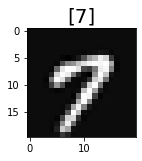

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 3500

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(20,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[idx]), fontsize = 20)



In [ ]:

#first upload project4-2-weights.mat to colab
#ابتدا فایل مربوطه را در این محیط آپلود کرده
#load the .mat file using scipy library
#تصاویر را در یک متغیر لود می کنیم scipy با استفاده از کتابخانه 

from scipy.io import loadmat

weights = loadmat('/content/drive/MyDrive/ml-projects/week4/project4-2-weights.mat')

theta1, theta2 = weights["Theta1"], weights["Theta2"]


In [ ]:
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of X[idx]:", X[idx].shape)
print("shape of Y:", Y.shape)


shape of X: (5000, 400)
shape of X[idx]: (400,)
shape of Y: (5000, 1)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
X.shape

(400, 5000)

In [ ]:
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 5000)

In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(401, 5000)

In [ ]:
#create a function for sigmoid g = 1/(1 + e^-x)
#ابتدا تابع سیگموید را پیاده سازی کنید
def sigmoid(x):
  g = 1/(1+np.exp(-x))
  return g
  

# Create predict function using the formula in the slide


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1sxVH40ipiXH_93wev5YHY0xgx4Y5dkeJ">
</p>




In [ ]:
def predict(theta1, theta2, X):
  
  z2 = np.matmul(theta1, X)
  a2 = sigmoid(z2)

  #add bias term
  a2 = np.concatenate([np.ones((1)), a2], axis=0)

  z3 = np.matmul(theta2, a2)
  a3 = sigmoid(z3)

  return a3

In [ ]:
outputs = predict(theta1, theta2, X[:,4100])
print(outputs)
predicted_digit = np.argmax(outputs)
print("predicted digit: ", predicted_digit)

[3.06915376e-06 7.08281229e-02 8.72991871e-02 3.17814279e-02
 1.49801164e-02 2.71296662e-03 2.27349873e-02 4.28802019e-04
 9.25727811e-02 6.44977594e-04]
predicted digit:  8


Text(0.5, 1.0, '8')

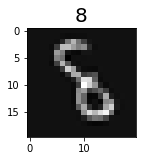

In [ ]:
#now lets show the test image and see if our model is working well
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 4100

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(20,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[1:, idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[0,idx]), fontsize = 20)

